### Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information

Input variables (based on physicochemical tests):

    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol

Output variable (based on sensory data):
    
    12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

#### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- No null values
- 'quality' - datatype is integer
- datatype of the rest is float

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- STD of alcohol and quality is close to 1
- mean of chlorides, citric acid and volatile acidity very close to 0
- lowest 'min value' is 0 -> citric acid

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Adding 'Class' column where quality>5=Good || quality<5=NotGood

In [6]:
classs = []

for i in df['quality']:
    if i>=6:
        classs.append(1)
    elif i<6: 
        classs.append(0)
    else:
        classs.append(' ')

df['class']=classs

In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,1
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
281,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,7,1
1385,8.0,0.81,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2,5,0
1183,6.8,0.66,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5,0
1424,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6,1
1276,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4,0
1432,5.9,0.44,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6,1
1085,6.8,0.48,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,5,0
805,8.2,0.28,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7,1


In [8]:
df['class'].value_counts()

1    855
0    744
Name: class, dtype: int64

#### Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

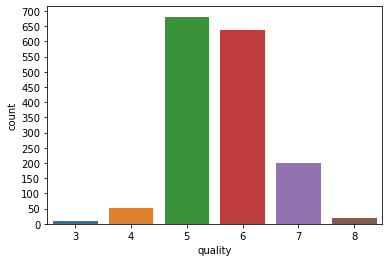

In [9]:
plt.yticks(np.arange(0,750,50))
sns.countplot(df['quality'])

- quality values (5 & 6) are more in number compared to the rest

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

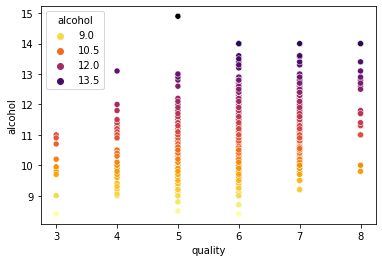

In [10]:
sns.scatterplot(y=df['alcohol'],x=df['quality'],hue=df['alcohol'],palette='inferno_r')

<AxesSubplot:>

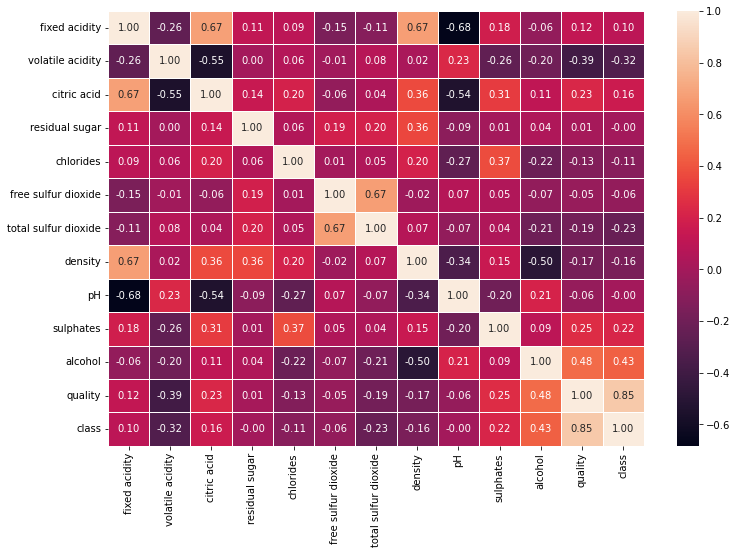

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='w',linewidths=.5)

- Since we are predicting the 'Class' using the features:
   
        - fixed acidity = 10%
        - volatile acidity = -32%
        - citric acid = 26%
        - residual sugar = -0%                         } features correlation with the target variable 'Class'
        - chlorides = -11%
        - free sulfur dioxide = -6%
        - total sulfur dioxide = -23%
        - density = -16%
        - pH = -0
        - sulphates = 22% 
        - alcohol = 43%
        - quality - 85%

- Highest correlation is quality but that is obvious since we derived the target variable from 'quality'.
- Hence, the second highest correlation is of 'alcohol' = 43%

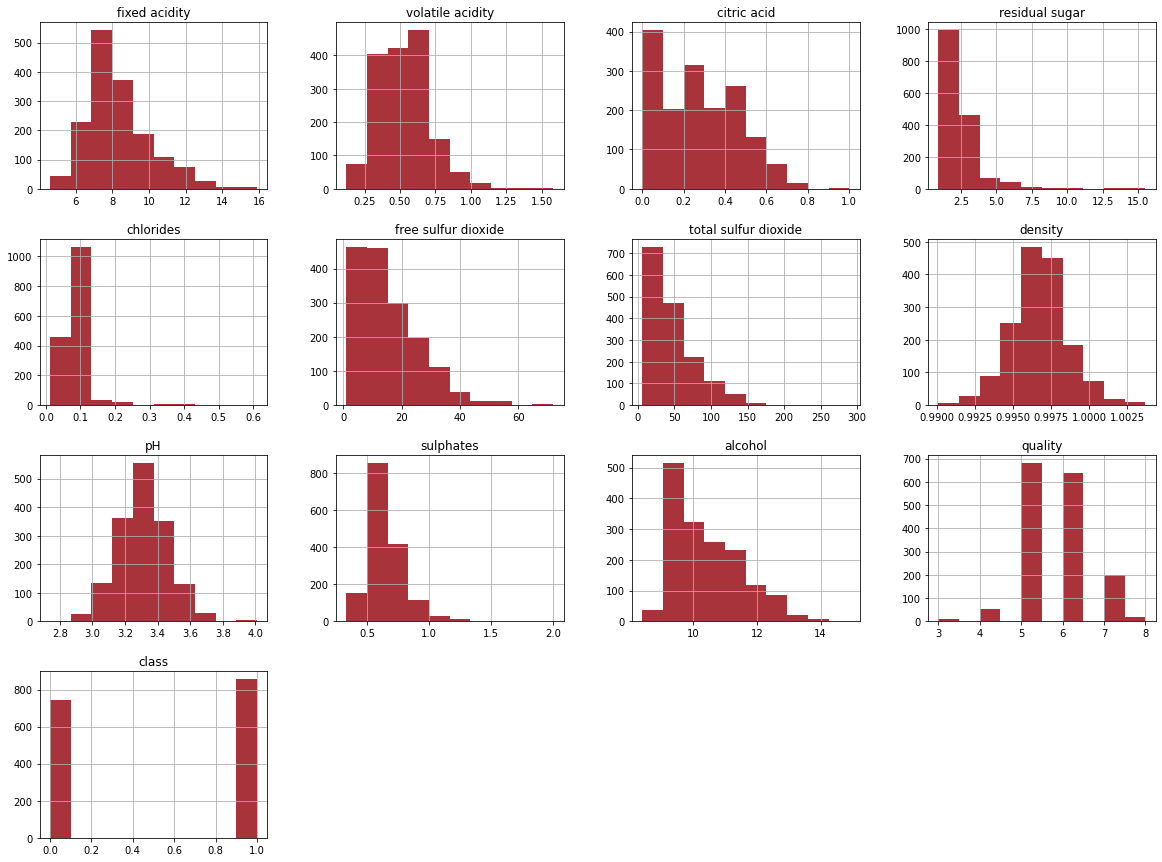

In [12]:
df.hist(figsize=(20,15),color='#A9333A')
plt.show()

- density and pH follow normal distibution while the rest are skewed

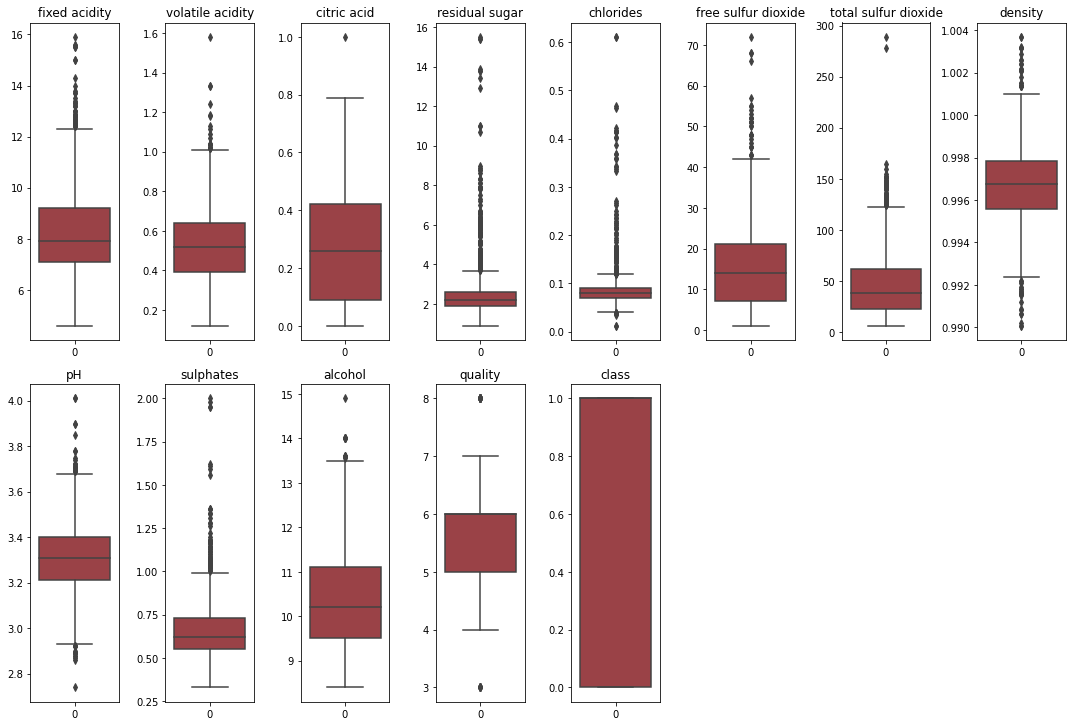

In [13]:
#looking for outliers

collist=df.columns.values
ncols=8
nrows=4

plt.figure(figsize=(15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.title(collist[i])
    sns.boxplot(data=df[collist[i]],orient='v',color='#A9333A',linewidth=1.5,)
    plt.tight_layout()

- outliers present in every column

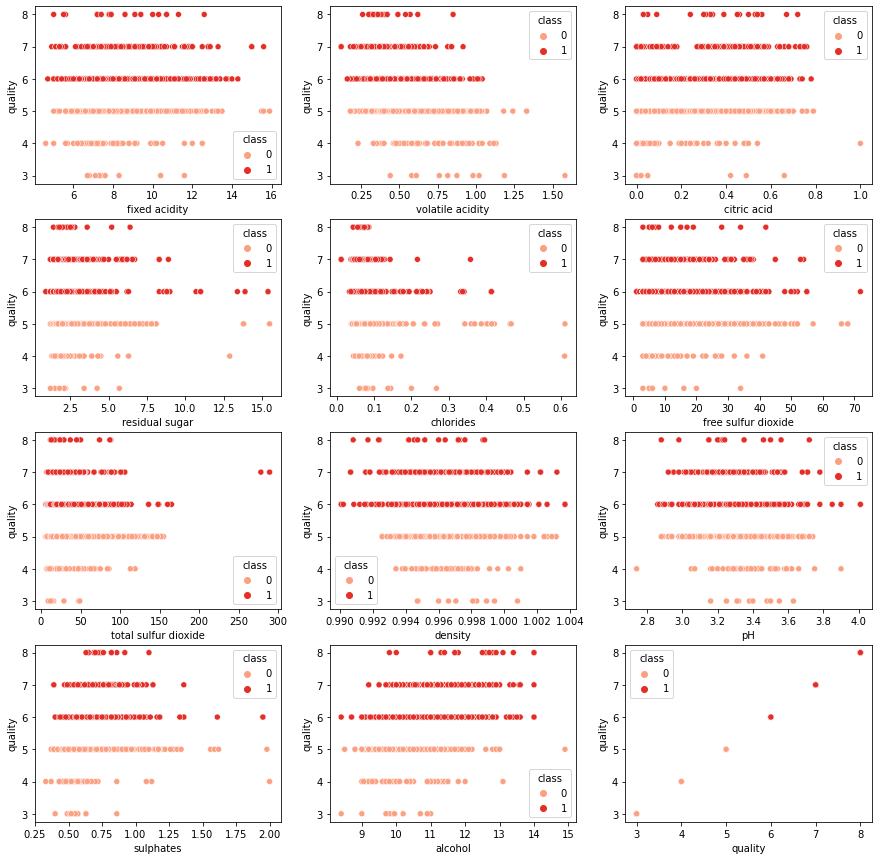

In [14]:
fig,p=plt.subplots(4,3,figsize=(15,15))
i,j,k=0,0,0
for j in range(0,4):
    for k in range(0,3):
        sns.scatterplot(x=df.columns[i],y='quality',data=df,ax=p[j,k],hue='class',palette='Reds')
        i=i+1

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

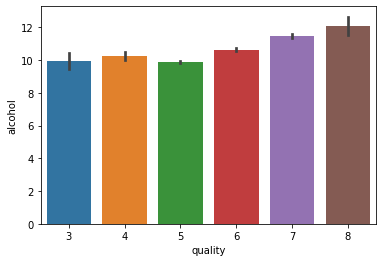

In [15]:
sns.barplot(x='quality',y='alcohol',data=df)

- alcohol of quality 8 usually have more alcohol, in other words (higher the alcohol ~> more the quality)  

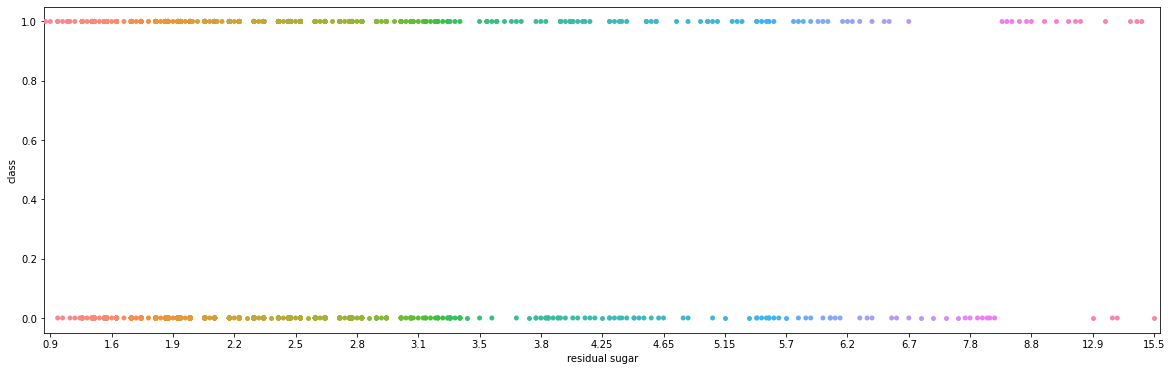

In [16]:
plt.figure(figsize=(20,6))
sns.set
sns.swarmplot(x='residual sugar', y='class', data=df)
plt.locator_params(axis='x', nbins=20)
plt.show()

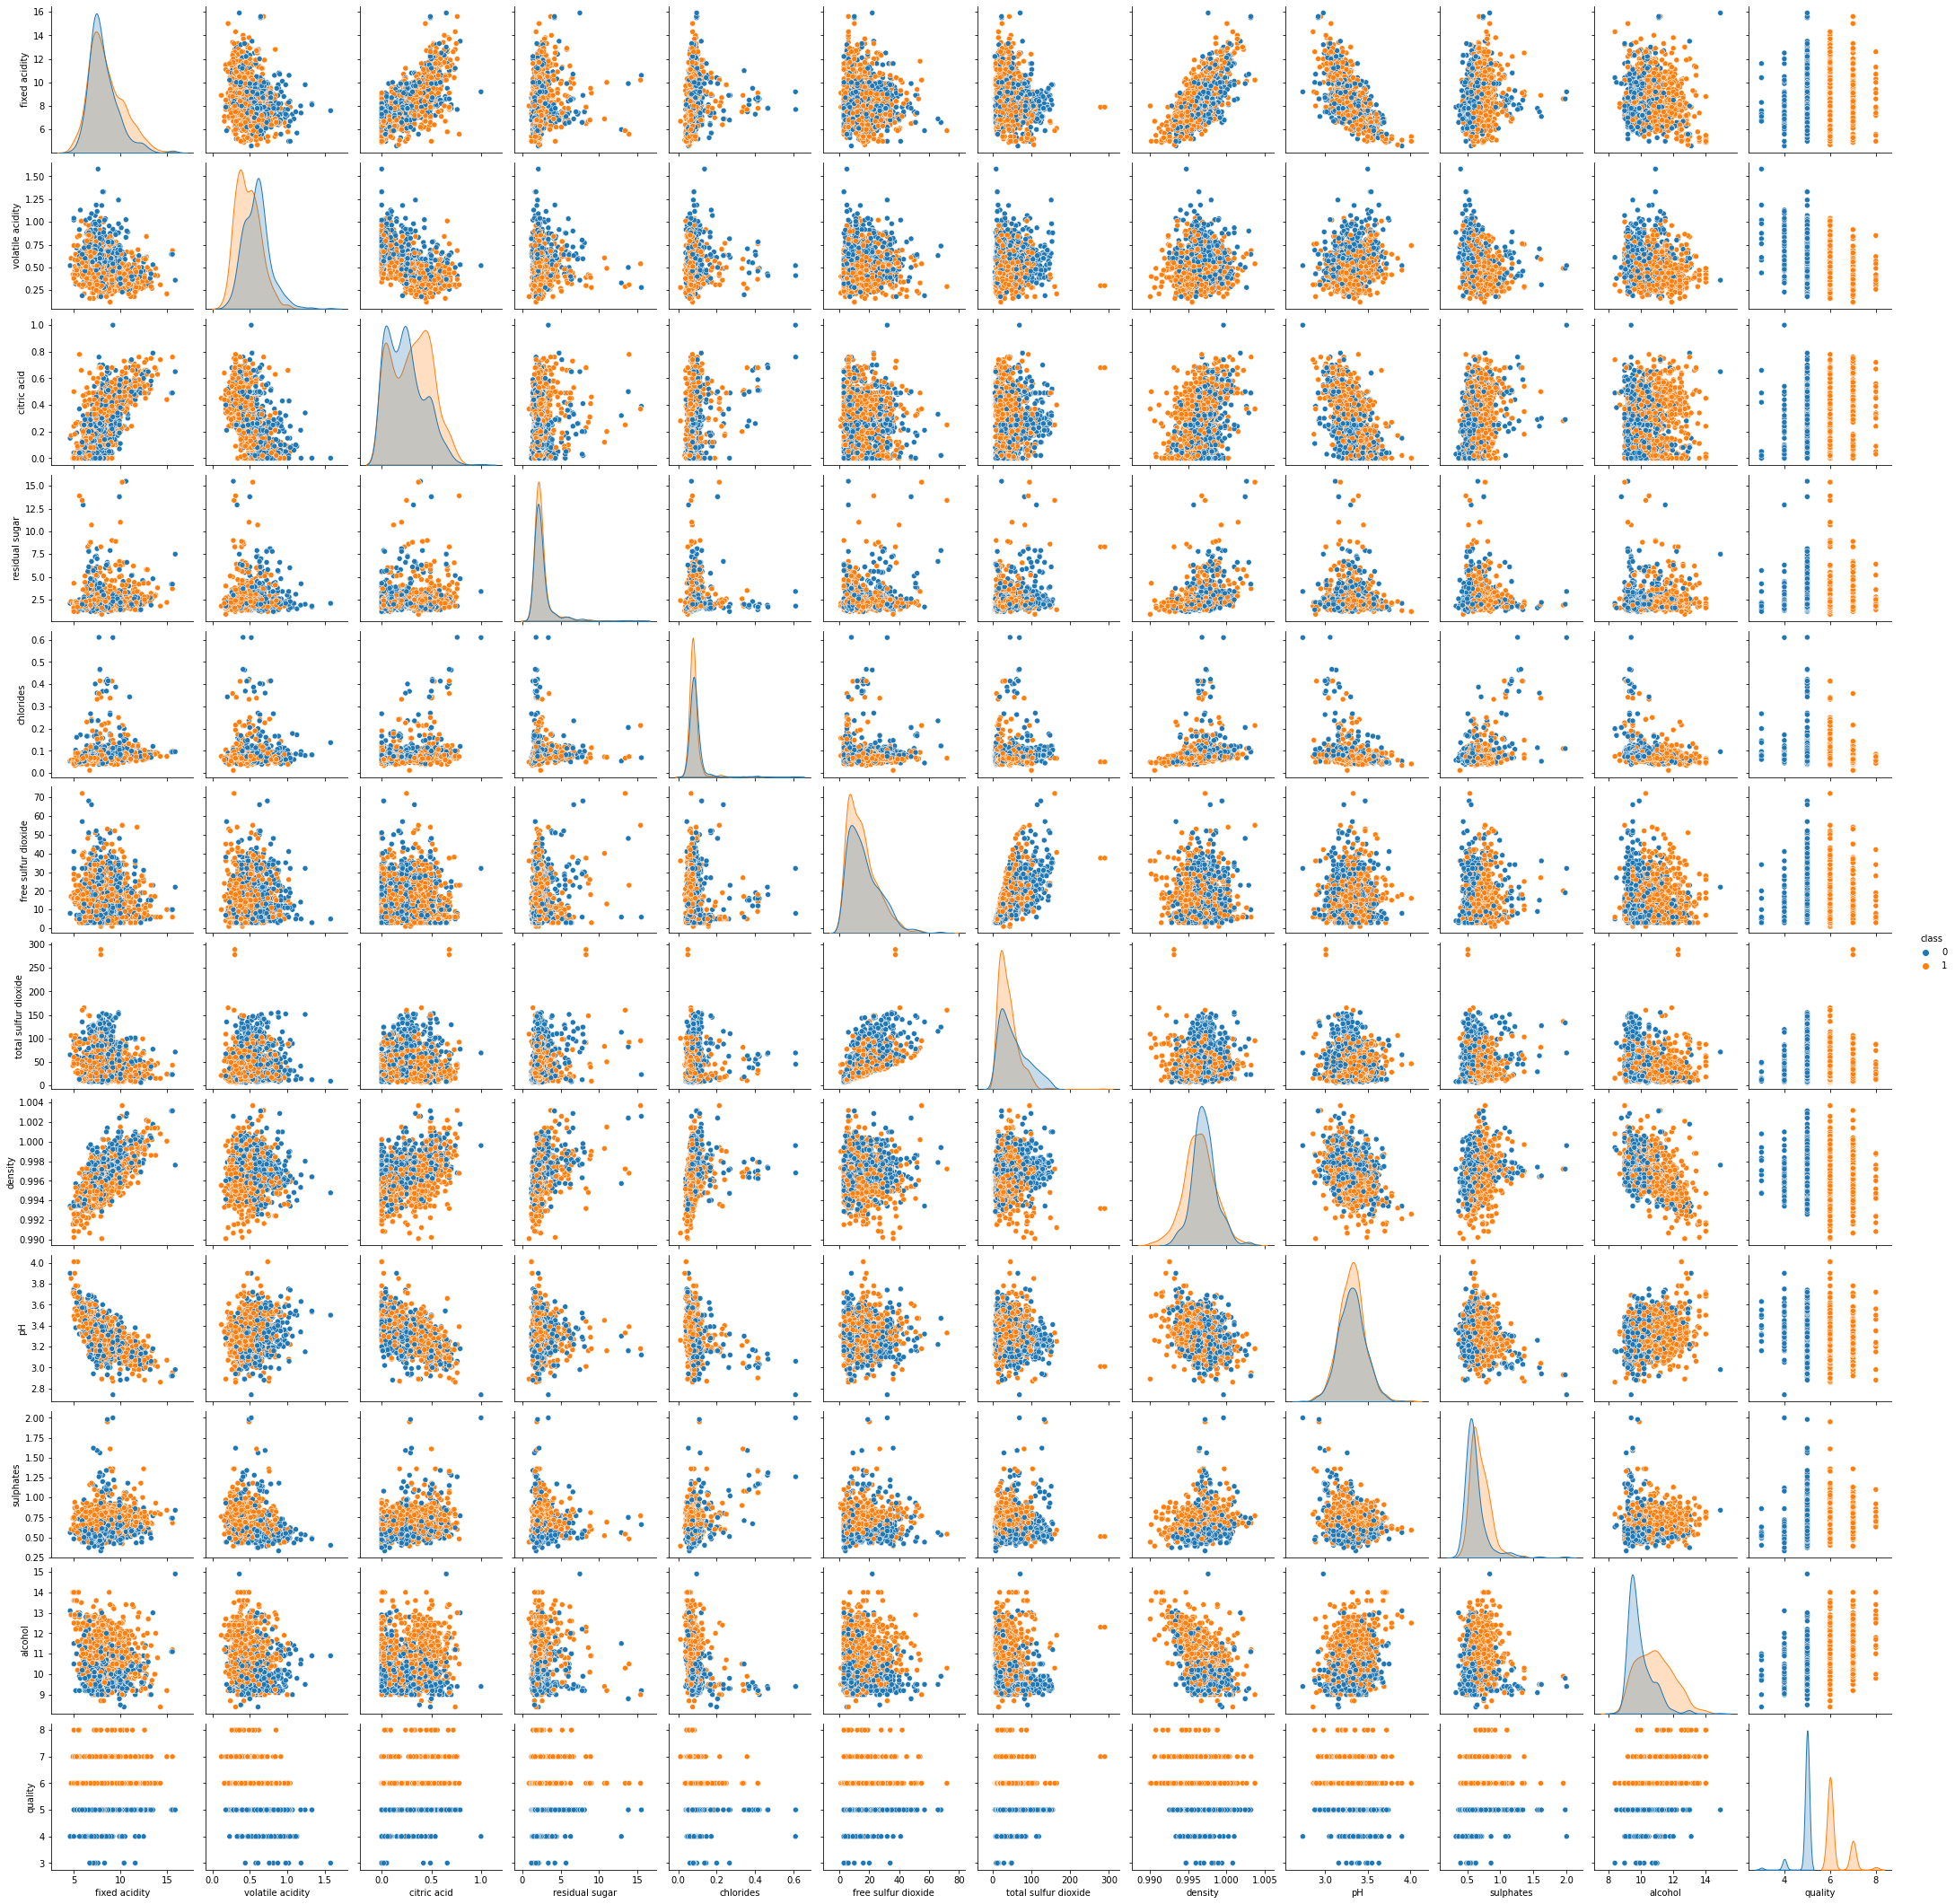

In [17]:
sns.pairplot(df,hue='class')

#### Skew

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
class                  -0.139303
dtype: float64

• +/- 0.5 skewness threshold

     - least skewness: citric acid, density, pH, quality
     - high skewness: fixed acidity, volatile acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur doxide                       sulphates, alcohol

In [19]:
#coverting 'quality' and 'class' datatype to float
df[['quality','class']]=df[['quality','class']].astype(float)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0


In [20]:
df.dtypes.value_counts() #all of them are floats now

float64    13
dtype: int64

#### Removing outliers using zscore

In [21]:
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,1.072004
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823,1.072004
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823,1.072004
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848,0.932832
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,1.072004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823,1.072004
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848,0.932832
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848,0.932832
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823,1.072004


In [22]:
np.where(z>2.5)

(array([   9,   11,   13,   14,   14,   15,   15,   17,   17,   19,   33,
          38,   42,   43,   45,   45,   57,   79,   81,   81,   83,   83,
          86,   86,   88,   90,   91,   91,   92,   92,   94,   94,   95,
         106,  106,  109,  120,  126,  127,  130,  134,  142,  142,  144,
         144,  145,  147,  151,  151,  151,  151,  154,  156,  163,  164,
         169,  169,  181,  188,  189,  199,  201,  205,  206,  219,  226,
         226,  234,  239,  240,  240,  243,  244,  258,  258,  258,  267,
         274,  278,  278,  281,  291,  294,  307,  308,  313,  324,  324,
         325,  325,  328,  339,  340,  347,  353,  353,  353,  354,  354,
         364,  364,  366,  366,  369,  374,  376,  377,  378,  378,  381,
         390,  391,  394,  395,  396,  396,  400,  400,  413,  415,  415,
         429,  440,  440,  442,  442,  442,  451,  455,  455,  459,  463,
         467,  470,  480,  480,  481,  484,  491,  492,  494,  495,  497,
         498,  501,  502,  509,  515, 

In [23]:
df_new = df[(z<2.5).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,0.0


In [24]:
print ('The percentage of data lost =',(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

The percentage of data lost = 17.38586616635397 %


In [25]:
df_new.skew() #skewess also reduced as a result of this

fixed acidity           0.775955
volatile acidity        0.218699
citric acid             0.293582
residual sugar          2.237383
chlorides               1.609869
free sulfur dioxide     0.798658
total sulfur dioxide    1.015204
density                 0.041739
pH                      0.084544
sulphates               0.781633
alcohol                 0.687476
quality                 0.224961
class                  -0.159656
dtype: float64

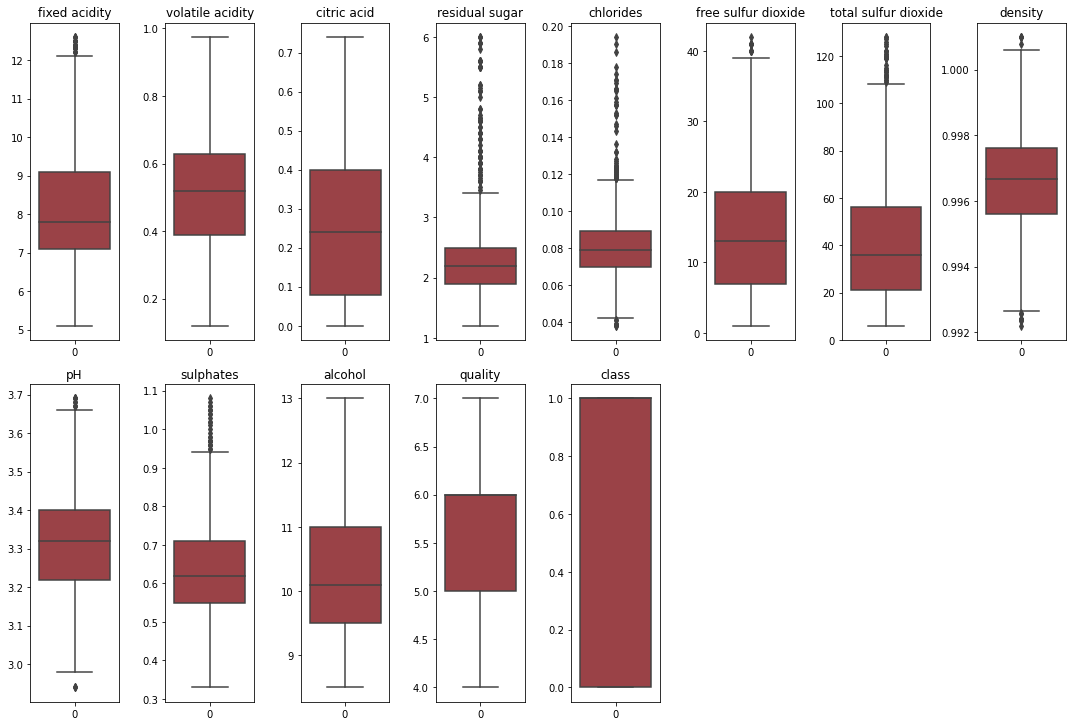

In [26]:
#looking for outliers after zscore

collist=df_new.columns.values
ncols=8
nrows=4

plt.figure(figsize=(15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.title(collist[i])
    sns.boxplot(data=df_new[collist[i]],orient='v',color='#A9333A',linewidth=1.5,)
    plt.tight_layout()

- outliers still present in some of the columns ['fixed acidity','residual sugar','chlorides','free sulfur dioxide',
total sulfur dioxide', 'density, 'pH', 'sulphates']

In [27]:
corr_diff = pd.DataFrame({'Correlation':df.corr()['class'],'Correlation after zscore':df_new.corr()['class']})
corr_diff #as seen here correlation has increased

,Correlation,Correlation after zscore
fixed acidity,0.095093,0.107858
volatile acidity,-0.321441,-0.296545
citric acid,0.159129,0.166615
residual sugar,-0.002160,0.012454
chlorides,-0.109494,-0.112651
free sulfur dioxide,-0.061757,-0.021948
total sulfur dioxide,-0.231963,-0.225223
density,-0.159110,-0.158735
pH,-0.003264,-0.034352
sulphates,0.218072,0.332858


#### Applying PowerTransform

In [28]:
#checking skewness before applying power transform
before_PT = pd.DataFrame({'Before PT':df.skew()})
before_PT

,Before PT
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


In [29]:
from sklearn.preprocessing import power_transform

df_new_PT = power_transform(df_new,method='yeo-johnson')
df_new_PT 

array([[-0.45061514,  1.09042186, -1.50744971, ..., -1.1208299 ,
        -0.84654032, -1.08291152],
       [-0.13542119,  2.0452886 , -1.50744971, ..., -0.51390428,
        -0.84654032, -1.08291152],
       [-0.13542119,  1.41837347, -1.21776338, ..., -0.51390428,
        -0.84654032, -1.08291152],
       ...,
       [-1.50709219, -0.02125802, -0.61960516, ...,  0.79987428,
         0.54412345,  0.92343647],
       [-1.98007332,  0.78056145, -0.6827172 , ..., -0.00268141,
        -0.84654032, -1.08291152],
       [-1.85646335, -1.33597396,  1.14946092, ...,  0.79987428,
         0.54412345,  0.92343647]])

In [30]:
after_PT = pd.DataFrame(df_new_PT,columns=df.columns.values)
after_PT.skew()

fixed acidity           0.027532
volatile acidity       -0.001810
citric acid             0.022994
residual sugar         -0.016190
chlorides              -0.089589
free sulfur dioxide    -0.026383
total sulfur dioxide   -0.014976
density                 0.000198
pH                      0.000014
sulphates               0.018412
alcohol                 0.108609
quality                -0.001589
class                  -0.159656
dtype: float64

In [31]:
skew_diff = pd.concat([before_PT,after_PT.skew()],axis=1)
skew_diff['After PT'] = skew_diff[0]
skew_diff[['Before PT','After PT']]

,Before PT,After PT
fixed acidity,0.982751,0.027532
volatile acidity,0.671593,-0.001810
citric acid,0.318337,0.022994
residual sugar,4.540655,-0.016190
chlorides,5.680347,-0.089589
free sulfur dioxide,1.250567,-0.026383
total sulfur dioxide,1.515531,-0.014976
density,0.071288,0.000198
pH,0.193683,0.000014
sulphates,2.428672,0.018412


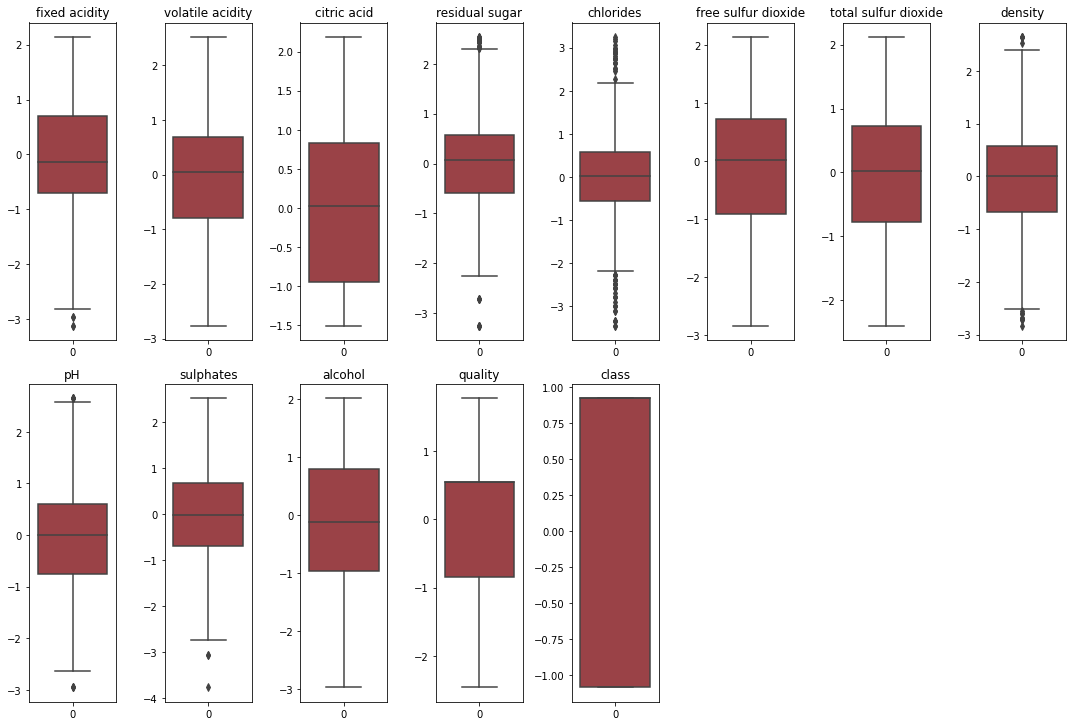

In [32]:
#looking for outliers after power transform

collist=after_PT.columns.values
ncols=8
nrows=4

plt.figure(figsize=(15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    plt.title(collist[i])
    sns.boxplot(data=after_PT[collist[i]],orient='v',color='#A9333A',linewidth=1.5,)
    plt.tight_layout()

- outliers have mostly been removed with a few exceptions

In [33]:
#dropping 'chlorides', 'residual sugar' and 'density' due to the high number of outliers present in it
after_PT.drop(after_PT[['chlorides','residual sugar','density']],axis=1,inplace=True)
after_PT

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,class
0,-0.450615,1.090422,-1.507450,-0.250827,-0.060417,1.390603,-0.585718,-1.120830,-0.846540,-1.082912
1,-0.135421,2.045289,-1.507450,1.133366,1.016990,-0.897775,0.467340,-0.513904,-0.846540,-1.082912
2,-0.135421,1.418373,-1.217763,0.242980,0.665332,-0.441872,0.231276,-0.513904,-0.846540,-1.082912
3,1.671630,-1.548501,1.523844,0.452256,0.836049,-1.205368,-0.388601,-0.513904,0.544123,0.923436
4,-0.450615,1.090422,-1.507450,-0.250827,-0.060417,1.390603,-0.585718,-1.120830,-0.846540,-1.082912
...,...,...,...,...,...,...,...,...,...,...
1316,-1.620127,0.520058,-0.943292,1.598357,0.339242,0.960309,-0.388601,0.328754,-0.846540,-1.082912
1317,-1.980073,0.222799,-0.811344,1.987594,0.573556,1.461758,1.023872,0.964103,0.544123,0.923436
1318,-1.507092,-0.021258,-0.619605,1.410193,0.190082,0.742966,0.959583,0.799874,0.544123,0.923436
1319,-1.980073,0.780561,-0.682717,1.598357,0.339242,1.815172,0.687777,-0.002681,-0.846540,-1.082912


#### Seperating values into X & Y

In [34]:
x = after_PT.drop(after_PT[['quality','class']],axis=1)
y = df_new['class']

#### Applying StandardScaler to X

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-0.45061514,  1.09042186, -1.50744971, ...,  1.39060303,
        -0.58571769, -1.1208299 ],
       [-0.13542119,  2.0452886 , -1.50744971, ..., -0.89777489,
         0.46733982, -0.51390428],
       [-0.13542119,  1.41837347, -1.21776338, ..., -0.44187185,
         0.23127629, -0.51390428],
       ...,
       [-1.50709219, -0.02125802, -0.61960516, ...,  0.74296604,
         0.95958344,  0.79987428],
       [-1.98007332,  0.78056145, -0.6827172 , ...,  1.81517243,
         0.68777711, -0.00268141],
       [-1.85646335, -1.33597396,  1.14946092, ...,  0.52413323,
         0.31178512,  0.79987428]])

In [36]:
print('Mean:',x.mean(),'\nSTD:',x.std())

Mean: 1.1430002373128032e-17 
STD: 1.0


#### Seperating into train_test_split

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### Model Building

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc,plot_confusion_matrix,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.preprocessing import LabelBinarizer

def roc_auc_score_(y_test,y_pred):
    LB = LabelBinarizer()
    LB_y_test = LB.fit_transform(y_test)
    LB_y_pred = LB.fit_transform(y_pred)
    return round(roc_auc_score(LB_y_test,LB_y_pred)*100,2)

In [40]:
#SupportVectorClassifier()

svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'random_state':range(1,101)}
gsCV_svc = GridSearchCV(svc,svc_para,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 1, 'kernel': 'rbf', 'random_state': 1}

SVC Test Score: 78.49 %
ROC_AUC Value: 78.49 %


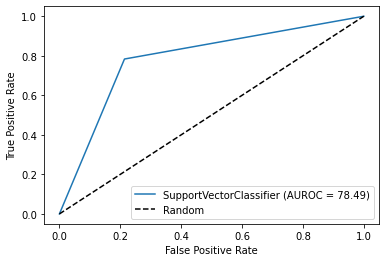

In [41]:
svc=SVC(C=1,kernel='rbf',random_state=1)
svc.fit(x_train,y_train)
svc_y_pred = svc.predict(x_test)
svc_test_score = round(accuracy_score(y_test,svc_y_pred)*100,2)

svc_fpr,svc_tpr,_ = roc_curve(y_test,svc_y_pred) #calculating the false positive rate and the true positive rate to plot graph
svc_roc_s = roc_auc_score_(y_test,svc_y_pred)
svc_auc = round(auc(svc_fpr,svc_tpr),3)

print ("SVC Test Score:",svc_test_score,'%')
print ("ROC_AUC Value:",svc_roc_s,'%')

#plotting the curve
plt.plot(svc_fpr,svc_tpr,label='SupportVectorClassifier (AUROC = %.2f)' % svc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
#DecisionTreeClassifier()

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'random_state':range(1,101)}
gsCV_dtc = GridSearchCV(dtc,dtc_para,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'gini', 'random_state': 6, 'splitter': 'random'}

Test Score: 76.6 %
ROC_AUC Score: 76.58 %


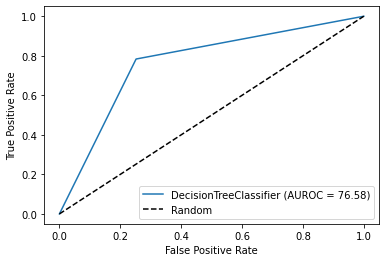

In [45]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=6,splitter='random')
dtc.fit(x_train,y_train)
dtc_y_pred = dtc.predict(x_test)
dtc_test_score = accuracy_score(y_test,dtc_y_pred)

dtc_fpr, dtc_tpr, _ = roc_curve(y_test,dtc_y_pred)
dtc_roc_s = roc_auc_score_(y_test,dtc_y_pred)


print ("Test Score:",round(dtc_test_score*100,2),'%')
print ("ROC_AUC Score:",dtc_roc_s,'%')

plt.plot(dtc_fpr, dtc_tpr, label='DecisionTreeClassifier (AUROC = %.2f)' % dtc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Test Score: 82.26 %
ROC_AUC Score: 82.3 %


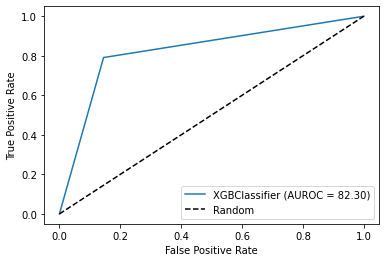

In [46]:
#XGBClassifier()

xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc_y_pred = xgbc.predict(x_test)
xgbc_test_score = accuracy_score(y_test,xgbc_y_pred)

xgbc_roc_s = roc_auc_score_(y_test,xgbc_y_pred)
xgbc_fpr, xgbc_tpr, _ = roc_curve(y_test,xgbc_y_pred)

print ("Test Score:",round(xgbc_test_score*100,2),'%')
print ("ROC_AUC Score:",xgbc_roc_s,'%')

plt.plot(xgbc_fpr,xgbc_tpr,label='XGBClassifier (AUROC = %.2f)' % xgbc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Test Score: 78.87 %
ROC_AUC Score: 78.88 %


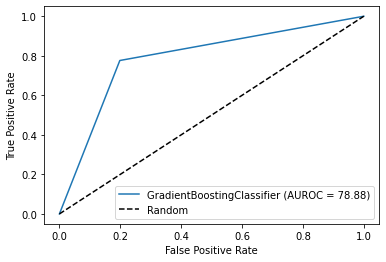

In [47]:
#GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_y_pred = gbc.predict(x_test)
gbc_test_score = accuracy_score(y_test,gbc_y_pred)

gbc_roc_s = roc_auc_score_(y_test,gbc_y_pred)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test,gbc_y_pred)

print ("Test Score:",round(gbc_test_score*100,2),'%')
print ("ROC_AUC Score:",roc_auc_score_(y_test,gbc_y_pred),'%')

plt.plot(gbc_fpr,gbc_tpr,label='GradientBoostingClassifier (AUROC = %.2f)' % gbc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [48]:
#RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,151,50),'criterion':['gini','entropy'],'random_state':range(1,51)}
gsCV_rfc = GridSearchCV(rfc,rfc_para,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 100, 'random_state': 35}

Test Score: 84.53 %
ROC_AUC Score: 84.56 %


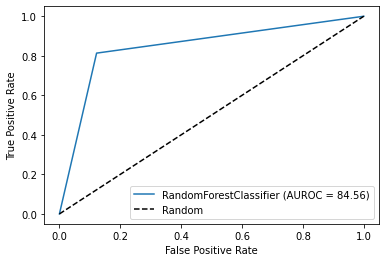

In [49]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=35)
rfc.fit(x_train,y_train)
rfc_y_pred = rfc.predict(x_test)
rfc_test_score = accuracy_score(y_test,rfc_y_pred)

rfc_roc_s = roc_auc_score_(y_test,rfc_y_pred)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test,rfc_y_pred)

print ("Test Score:",round(rfc_test_score*100,2),'%')
print ("ROC_AUC Score:",roc_auc_score_(y_test,rfc_y_pred),'%')

plt.plot(rfc_fpr,rfc_tpr,label='RandomForestClassifier (AUROC = %.2f)' % rfc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
#BaggingClassifier()

bc = BaggingClassifier()
bc_para = {'n_estimators':range(1,51)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 46}

Test Score: 82.26 %
ROC_AUC Score: 82.3 %


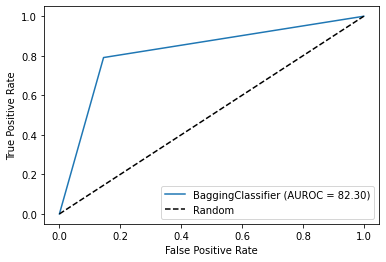

In [51]:
bc = BaggingClassifier(n_estimators=46)
bc.fit(x_train,y_train)
bc_y_pred = bc.predict(x_test)
bc_test_score = accuracy_score(y_test,bc_y_pred)

bc_roc_s = roc_auc_score_(y_test,bc_y_pred)
bc_fpr, bc_tpr, _ = roc_curve(y_test,bc_y_pred)

print ("Test Score:",round(bc_test_score*100,2),'%')
print ("ROC_AUC Score:",bc_roc_s,'%')

plt.plot(bc_fpr, bc_tpr, label='BaggingClassifier (AUROC = %.2f)' % bc_roc_s)
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Comparing the models

In [52]:
model_name = []
ROCAUC_score = []
CV = []
accuracy = []

models = {'BaggingClassifier': bc, 'SVC': svc, 'RandomForestClassifier': rfc,'DecisionTreeClassifier': dtc, 
          'GradientBoostingClassifier': gbc, 'XGBClassifier': xgbc}

for model in models.keys():
    models[model].fit(x_train, y_train)
    y_pred = models[model].predict(x_test)
    test_score = round(accuracy_score(y_test,y_pred)*100,2)
    roc_s = roc_auc_score_(y_test,y_pred)
    fpr,tpr,_ = roc_curve(y_test,y_pred)
    CVS = cross_val_score(models[model],x,y,cv=10,scoring='accuracy').mean()
    
    print ("-"*50)
    print ("Model Name:",model)
    model_name.append(model)
    print ("Test Score:",test_score,'%')
    accuracy.append(test_score)
    print ("ROC_AUC Score:",roc_s,'%')
    ROCAUC_score.append(roc_s)
    print ("CV Score:",(round(CVS*100,2)),'%')
    CV.append(round(CVS*100,2))

--------------------------------------------------
Model Name: BaggingClassifier
Test Score: 84.15 %
ROC_AUC Score: 84.18 %
CV Score: 69.43 %
--------------------------------------------------
Model Name: SVC
Test Score: 78.49 %
ROC_AUC Score: 78.49 %
CV Score: 73.74 %
--------------------------------------------------
Model Name: RandomForestClassifier
Test Score: 84.53 %
ROC_AUC Score: 84.56 %
CV Score: 69.96 %
--------------------------------------------------
Model Name: DecisionTreeClassifier
Test Score: 76.6 %
ROC_AUC Score: 76.58 %
CV Score: 63.75 %
--------------------------------------------------
Model Name: GradientBoostingClassifier
Test Score: 78.87 %
ROC_AUC Score: 78.88 %
CV Score: 71.09 %
--------------------------------------------------
Model Name: XGBClassifier
Test Score: 82.26 %
ROC_AUC Score: 82.3 %
CV Score: 69.43 %


In [53]:
model_df = pd.DataFrame({'Model Name':model_name,'Accuracy':accuracy,'ROC_AUC':ROCAUC_score,'CV':CV})
model_df.sort_values(by='Accuracy', ascending=False)

,Model Name,Accuracy,ROC_AUC,CV
2,RandomForestClassifier,84.53,84.56,69.96
0,BaggingClassifier,84.15,84.18,69.43
5,XGBClassifier,82.26,82.30,69.43
4,GradientBoostingClassifier,78.87,78.88,71.09
1,SVC,78.49,78.49,73.74
3,DecisionTreeClassifier,76.60,76.58,63.75


- According to the above table, RandomForestClassifier performed the best with the accuracy of 84%. Followed by BaggingClassifier(84%) then XGBoostClassifier(82%)

#### Saving the file

In [54]:
import pickle

file = "WineQuality_DataTrained"
pickle.dump(model_df,open(file,'wb'))